In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/chaleecheappimolchai/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel('gallardo_data.xlsx')
df.head()

,Model,Model year,Initial Price,Mileage,Current Price,Depreciation per Year,Depreciation per ThousandMiles(1600 KM)
0,Gallardo,2008,20510288,50000,5490000,938768,300406
1,Gallardo,2008,20510288,20000,6900000,850643,680514
2,LP560-4,2010,21632846,20000,6890000,1053060,737142
3,LP560-4,2009,21632846,30000,7580000,936856,468428
4,LP560-4,2009,21632846,10000,7990000,909523,1364285


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Model                                    18 non-null     object
 1   Model year                               18 non-null     int64 
 2   Initial Price                            18 non-null     int64 
 3   Mileage                                  18 non-null     int64 
 4   Current Price                            18 non-null     int64 
 5   Depreciation per Year                    18 non-null     int64 
 6   Depreciation per ThousandMiles(1600 KM)  18 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.1+ KB


In [4]:
#average all Gallardo model

round(df['Initial Price'].mean())

21612859

In [5]:
df_sorted = df.sort_values(by = 'Model year') 

In [6]:
# Filtering data to highlight trends
older_models = df_sorted[df_sorted['Model year'] <= 2008]
newer_models = df_sorted[df_sorted['Model year'] >= 2009]

In [7]:
older_models

,Model,Model year,Initial Price,Mileage,Current Price,Depreciation per Year,Depreciation per ThousandMiles(1600 KM)
0,Gallardo,2008,20510288,50000,5490000,938768,300406
1,Gallardo,2008,20510288,20000,6900000,850643,680514


In [8]:
model_counts = newer_models['Model'].value_counts()

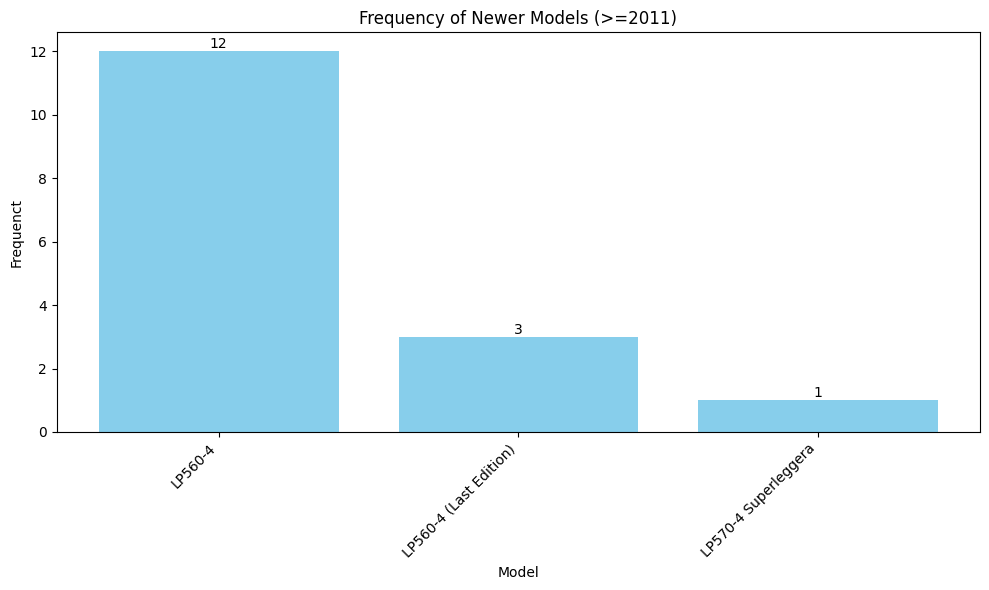

In [9]:
plt.figure(figsize = (10 , 6))
bars = plt.bar(model_counts.index , model_counts.values , color = 'skyblue')
plt.xlabel('Model')
plt.ylabel('Frequenct')
plt.title('Frequency of Newer Models (>=2011)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

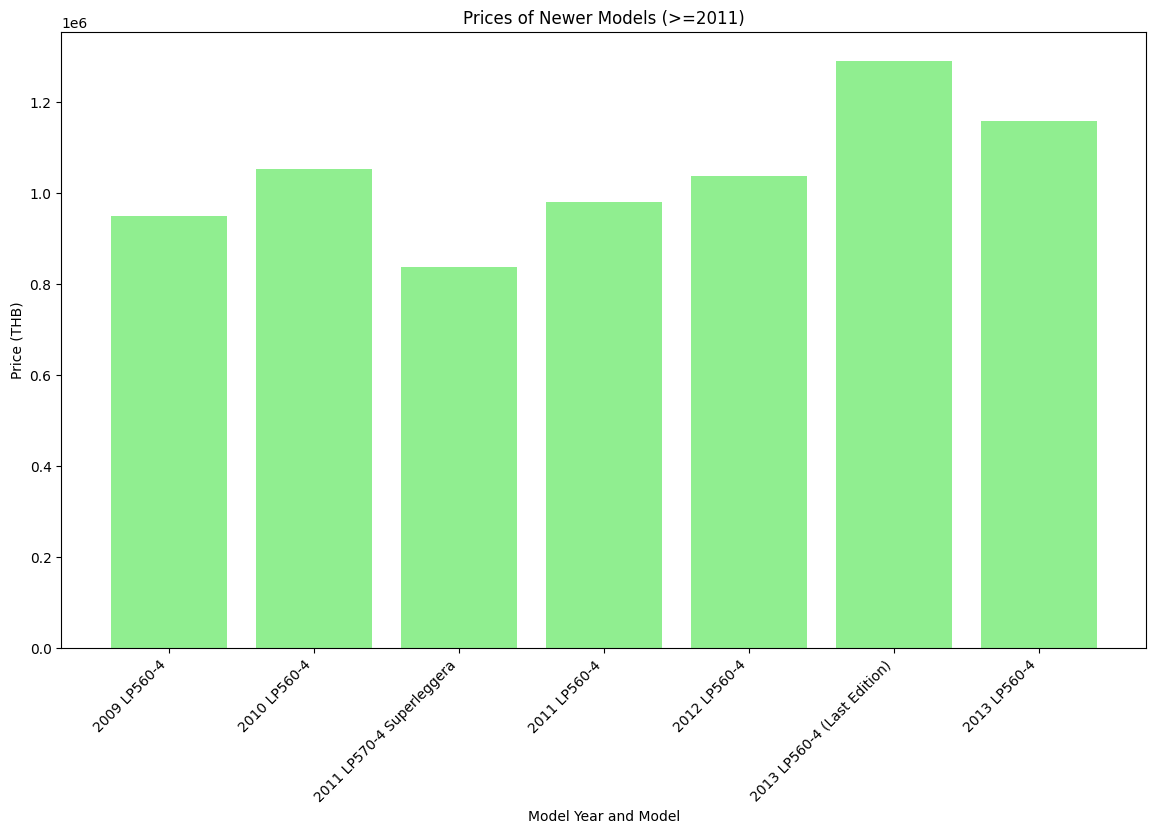

In [10]:
#Price of newer model
plt.figure(figsize = (15 ,8))
plt.figure(figsize=(14, 8))
bars = plt.bar(newer_models['Model year'].astype(str) + " " + newer_models['Model'], 
               newer_models['Depreciation per Year'], color='lightgreen')
plt.xlabel('Model Year and Model')
plt.ylabel('Price (THB)')
plt.title('Prices of Newer Models (>=2011)')
plt.xticks(rotation=45, ha='right');

In [11]:
newer_models.head()

,Model,Model year,Initial Price,Mileage,Current Price,Depreciation per Year,Depreciation per ThousandMiles(1600 KM)
3,LP560-4,2009,21632846,30000,7580000,936856,468428
4,LP560-4,2009,21632846,10000,7990000,909523,1364285
13,LP560-4,2009,21632846,50000,7400000,948856,284657
2,LP560-4,2010,21632846,20000,6890000,1053060,737142
5,LP560-4,2010,21632846,31088,8490000,938775,422763


<Figure size 1400x600 with 0 Axes>

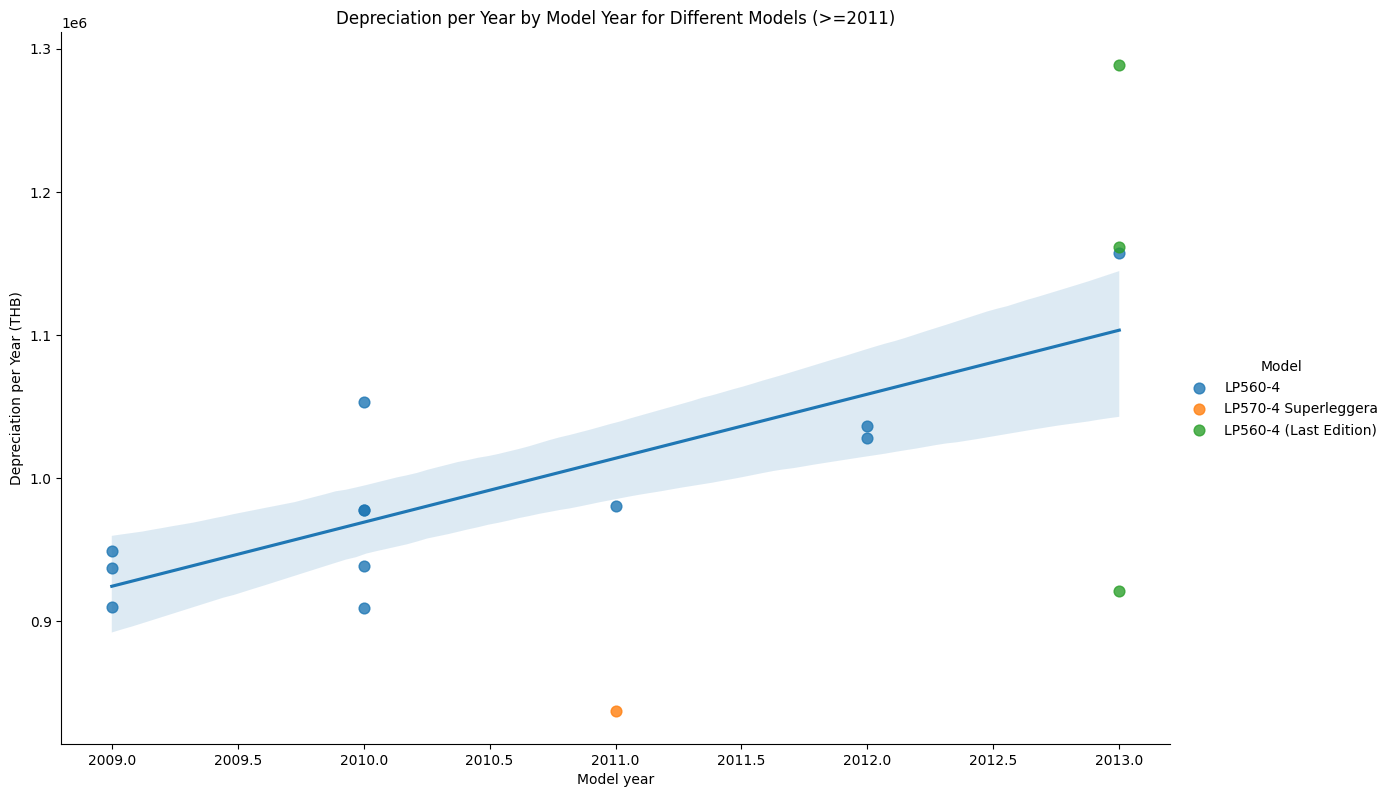

In [12]:
plt.figure(figsize = (14,6))
sns.lmplot(x = 'Model year' , y = 'Depreciation per Year'	, hue = 'Model' , data =newer_models ,
          height=8, aspect=1.5, scatter_kws={'s': 60}, ci=95)
plt.xlabel('Model year')
plt.ylabel('Depreciation per Year (THB)')
plt.title('Depreciation per Year by Model Year for Different Models (>=2011)')
plt.show()

<Figure size 1400x600 with 0 Axes>

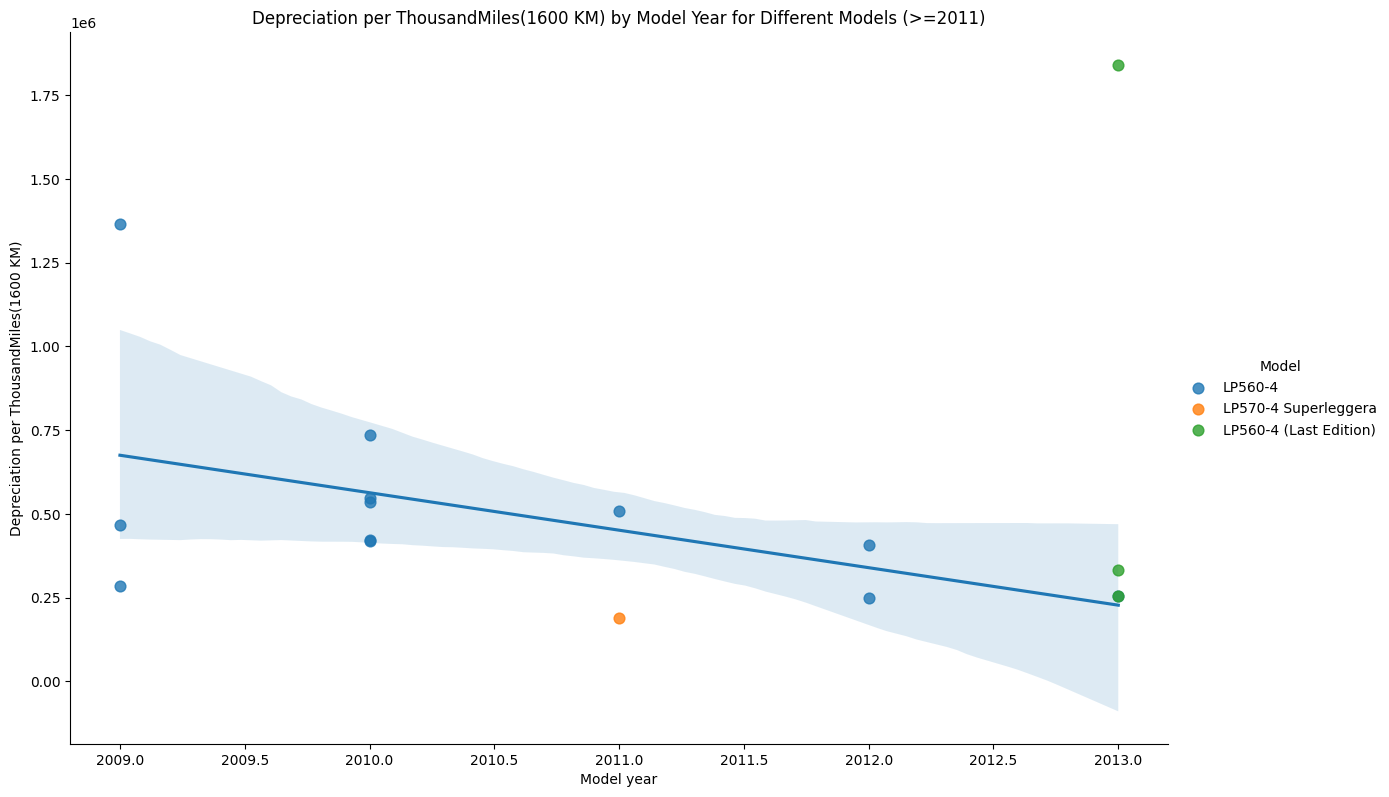

In [13]:
plt.figure(figsize = (14,6))
sns.lmplot(x = 'Model year' , y = 'Depreciation per ThousandMiles(1600 KM)'	, hue = 'Model' , data =newer_models ,
          height=8, aspect=1.5, scatter_kws={'s': 60}, ci=95)
plt.xlabel('Model year')
plt.ylabel('Depreciation per ThousandMiles(1600 KM)')
plt.title('Depreciation per ThousandMiles(1600 KM) by Model Year for Different Models (>=2011)')
plt.show()